<a href="https://colab.research.google.com/github/omkarhegde1999/Aerofit---Descriptive-Statistics/blob/main/Aerofit_Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
#Reading the csv file
df = pd.read_csv("aerofit.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [40]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Mile_bins
175,KP781,40,Male,21,Single,6,5,83416,200,35-40,70000-90000,150+
176,KP781,42,Male,18,Single,5,4,89641,200,40+,70000-90000,150+
177,KP781,45,Male,16,Single,5,5,90886,160,40+,90000+,150+
178,KP781,47,Male,18,Partnered,4,5,104581,120,40+,90000+,100-150
179,KP781,48,Male,18,Partnered,4,5,95508,180,40+,90000+,150+


In [6]:
df.shape

(180, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [9]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There aren't any missing values in the dataset.


In [10]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [11]:
for i in df.columns:
  print(i, ":",df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


From the above observation, we can conclude that only Income, Miles and Age can
be considered as Continuous, the rest of the columns though integers/floats should be considered as categories.

#### Checking value counts for categorical columns -


In [12]:
df["Product"].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [13]:
df["Gender"].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [14]:
df["Education"].value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

In [15]:
df["MaritalStatus"].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [16]:
df["Usage"].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [17]:
df["Fitness"].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

# A broader look at correlation between the columns of dataframe



In [18]:
# Creating a copy of the dataframe

df_copy = df.copy()
df_copy["Gender"].replace(["Male","Female"],[1,0],inplace=True)

df_copy["MaritalStatus"].replace(['Single','Partnered'],[0,1],inplace=True)

df_copy['Product'].replace(['KP281','KP481','KP781'],[0,1,2],inplace=True)

df_copy.corr()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.032225,0.230653,0.495018,-0.017602,0.537447,0.594883,0.624168,0.571596
Age,0.032225,1.000000,0.027544,0.280496,0.192152,0.015064,0.061105,0.513414,0.036618
Gender,0.230653,0.027544,1.000000,0.094089,-0.018836,0.214424,0.254609,0.202053,0.217869
Education,0.495018,0.280496,0.094089,1.000000,0.068569,0.395155,0.410581,0.625827,0.307284
MaritalStatus,-0.017602,0.192152,-0.018836,0.068569,1.000000,-0.007786,-0.050751,0.150293,0.025639
Usage,0.537447,0.015064,0.214424,0.395155,-0.007786,1.000000,0.668606,0.519537,0.759130
Fitness,0.594883,0.061105,0.254609,0.410581,-0.050751,0.668606,1.000000,0.535005,0.785702
Income,0.624168,0.513414,0.202053,0.625827,0.150293,0.519537,0.535005,1.000000,0.543473
Miles,0.571596,0.036618,0.217869,0.307284,0.025639,0.759130,0.785702,0.543473,1.000000


##Let's understand it more clearly using Heatmap.

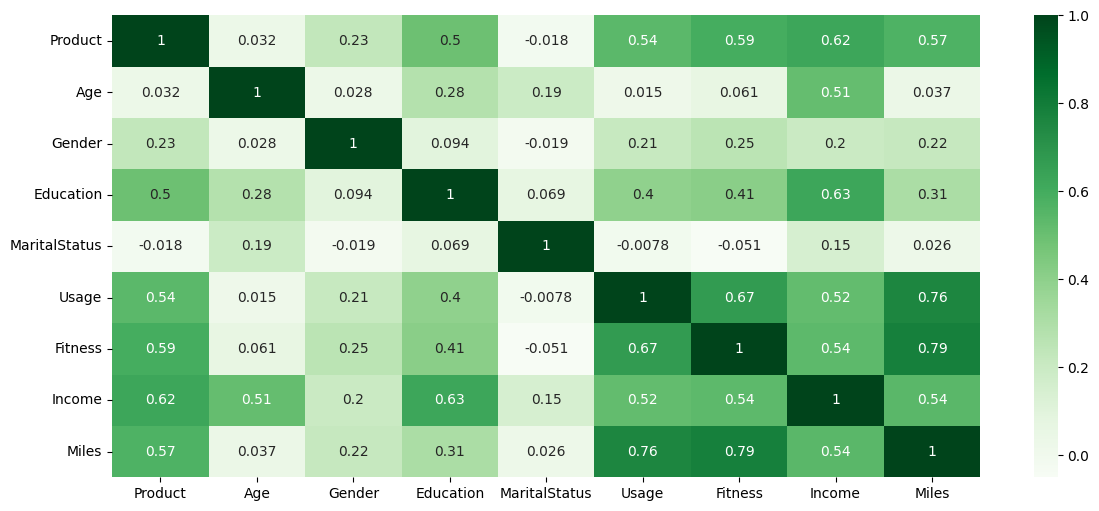

In [19]:
plt.figure(figsize=(14,6))
sns.heatmap(df_copy.corr(),cmap="Greens",annot=True)
plt.show()

###**Noteworthy Points**

1)   **Product**(treadmill) purchases are highly corelated with **Education, Usage, Fitness, Income, Miles**

2)   **Age** is highly correlated to **Income** (0.51) which definitely seems reasonable. It's also correlated with **Education** and **Marital Status** which stands completely alright.

3) **Gender** certainly has some correlation to **Usage, Fitness, Income and Miles**.

4) **Education** is correlated to **Age** and **Miles**. It's highly correlated to **Income** (as expected). It's sufficiently correlated to **Usage** and **Fitness** too.

5) **Marital Status** has some correlation to **Income** and **Age** (as expected).

6) **Usage** is extremely correlated to **Fitness** and **Miles** and has a higher correlation with **Income** as well.

7) **Fitness** has a great correlation with **Income**.

##More Observations and Possibiliies:

1) **Product, Fitness, Usage and Miles** depict a ridiculously higher correlation among themselves which looks as expected since more the usage implying more miles run and certainly more fitness.

2) Also a story which seems reasonable is that **Age** and **Education** (predominately) are indicators of **Income** which affects the products bought. The more advanced the product is, the more its usage and hence more the miles run which in turns improves the fitness.

Note:- Above point 2 is just something which may or mayn't be true as Correlation doesn't imply Causation.













Noteworthy Points

1) The product/treadmill purchased highly correlates with Education, Income, Usage, Fitness and Miles

2) Age is highly correlated to Income (0.51) which definitely seems reasonable. It's also correlated with Education and Marital Status which stands completely alright.

3) Gender certainly has some correlation to Usage, Fitness, Income and Miles.

4) Education is correlated to Age and Miles. It's highly correlated to Income (as expected). It's sufficiently correlated to Usage and Fitness too.

5) Marital Status has some correlation to Income and Age (as expected).

6) Usage is extremely correlated to Fitness and Miles and has a higher correlation with Income as well.

7) Fitness has a great correlation with Income.

More Observations and Possibilities:-

1) Product, Fitness, Usage and Miles depict a ridiculously higher correlation among themselves which looks as expected since more the usage implying more miles run and certainly more fitness.

2) Also a story which seems reasonable is that Age and Education (predominately) are indicators of Income which affects the products bought. The more advanced the product is, the more its usage and hence more the miles run which in turns improves the fitness.

Note:- Above point 2 is just something which may or mayn't be true as Correlation doesn't imply Causation.

#### Observing the Outliers of Age, Income and Miles -


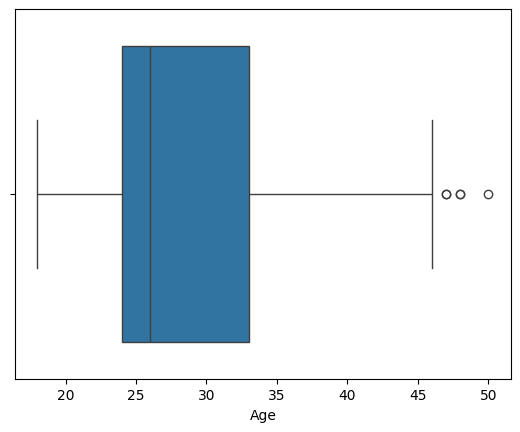

In [20]:
ax = sns.boxplot(x=df['Age'])

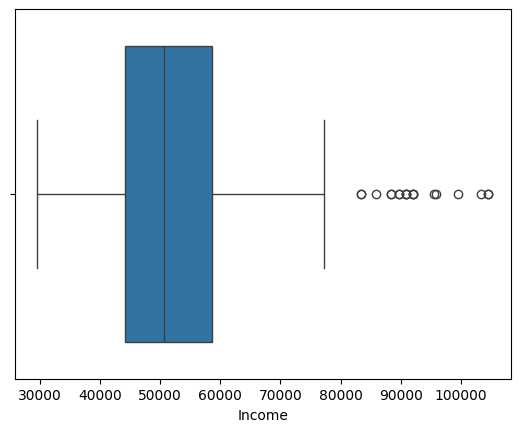

In [21]:
ix = sns.boxplot(x=df["Income"])

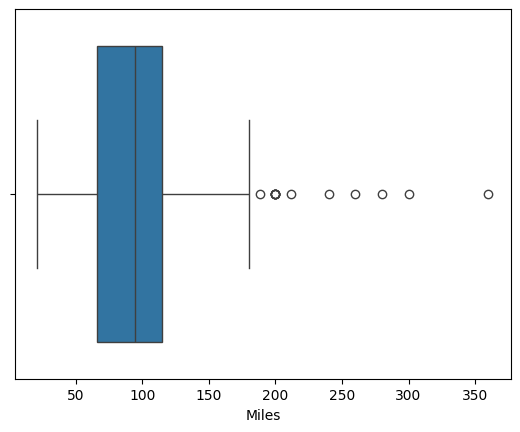

In [22]:
mx = sns.boxplot(x=df["Miles"])

##Certainly there are outliers in our data. When we remove them, this leads to loss of information and moreover we have a very small dataset of 180 rows

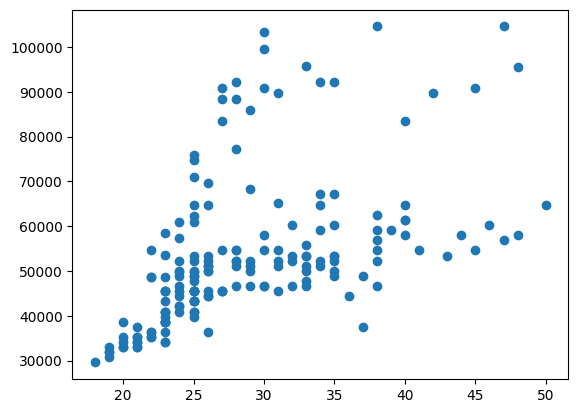

In [23]:
# Observing the association between Age and Income -
plt.scatter(df['Age'],df["Income"])

<ipython-input-24-f209a9630e55>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],hist=True, kde=True,


<function matplotlib.pyplot.show(close=None, block=None)>

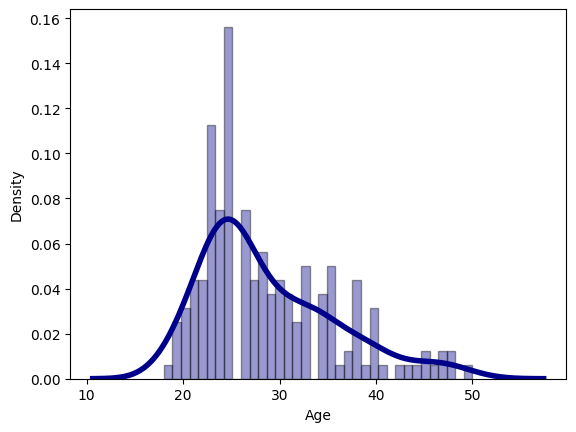

In [24]:
sns.distplot(df['Age'],hist=True, kde=True,
bins=int(36), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show

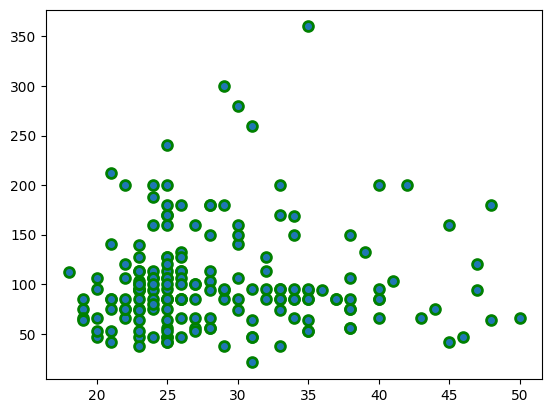

In [25]:
# Observing the association between Age and Miles -

plt.scatter(df['Age'], df['Miles'],
            linewidths = 2,
            edgecolor ="green",
            s = 50)

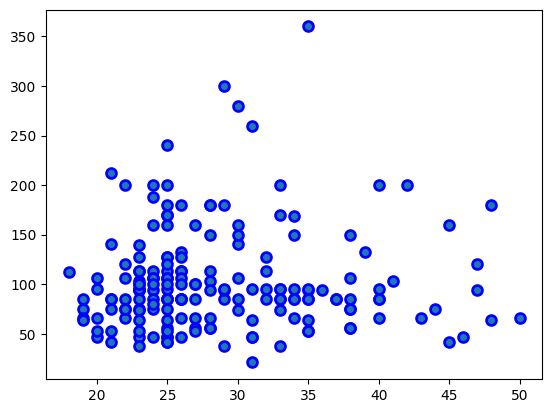

In [26]:
plt.scatter(df['Age'], df['Miles'],
            linewidths = 2,
            edgecolor ="blue",
            s = 50)

No significant pattern or observation between Age and Miles run on a treadmill, also implied by heatmap with a correlation of 0.037.

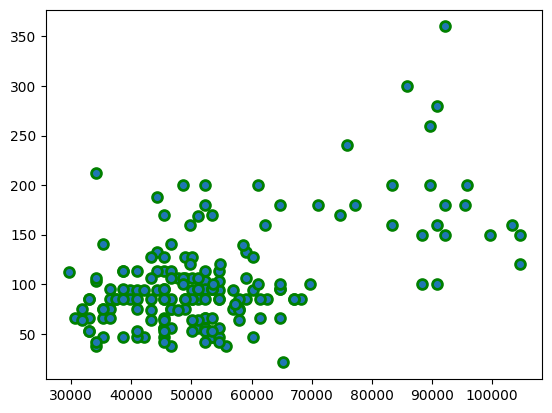

In [27]:
# Observing the association between Miles and Income -

plt.scatter(df['Income'], df['Miles'],
            linewidths = 2,
            marker ="o",
            edgecolor ="green",
            s = 50)

The miles run on treadmill increase significantly with income, infact only
people having incomes above 70000 have run over 220 miles. Moreover there's
also a **Heteroscadastic** effect.

#### Analysis of Categorical Columns with the Product -


For this section, We'll be converting the Ages, Incomes and Miles to bins for better analysis.

<ipython-input-28-538a9d3dd227>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], hist=True, kde=True,


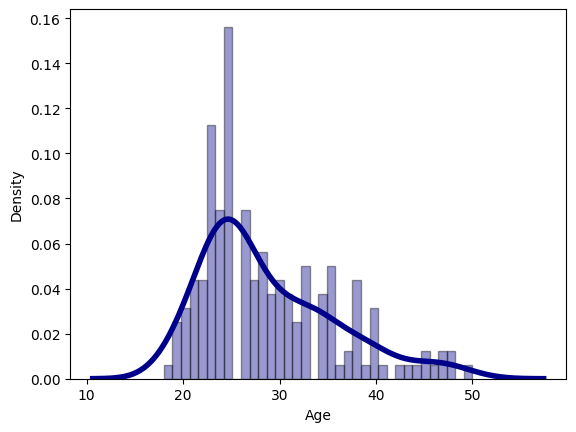

In [28]:
# Observing the ages to create bins -c

sns.distplot(df['Age'], hist=True, kde=True,
bins=int(36), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [29]:
# Creating bins on intervals of 5 as age gaps and below 20, above 40 -

bins = [-1,20,25,30,35,40,55]
labels = ['<20','20-25','25-30','30-35','35-40','40+']
df['Age_bins'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20
1,KP281,19,Male,15,Single,2,3,31836,75,<20
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20
3,KP281,19,Male,12,Single,3,3,32973,85,<20
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20


<ipython-input-30-fdaf4ff678eb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], hist=True, kde=True,


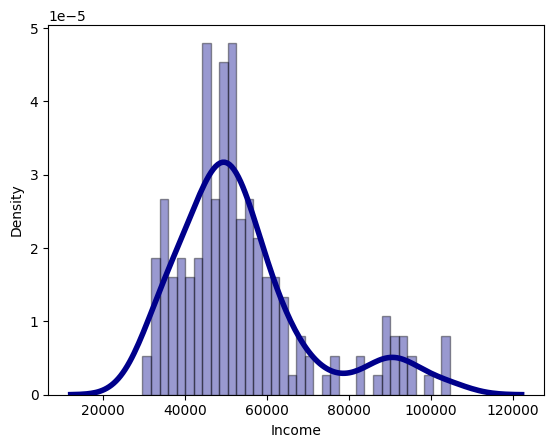

In [30]:
# Observing the incomes to create bins -

sns.distplot(df['Income'], hist=True, kde=True,
bins=int(36), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [31]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [32]:
bins = [1,35000,45000,50000,60000,70000,90000,120000]
labels = ['<35000','35000-45000','45000-50000','50000-60000','60000-70000','70000-90000','90000+']
df['Income_bins'] = pd.cut(df['Income'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000


In [33]:
df["Miles"].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [34]:
# Creating bins for miles -

bins = [-1,50,100,150,400]
labels = ['<50','50-100','100-150','150+']
df['Mile_bins'] = pd.cut(df['Miles'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Mile_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000,<50


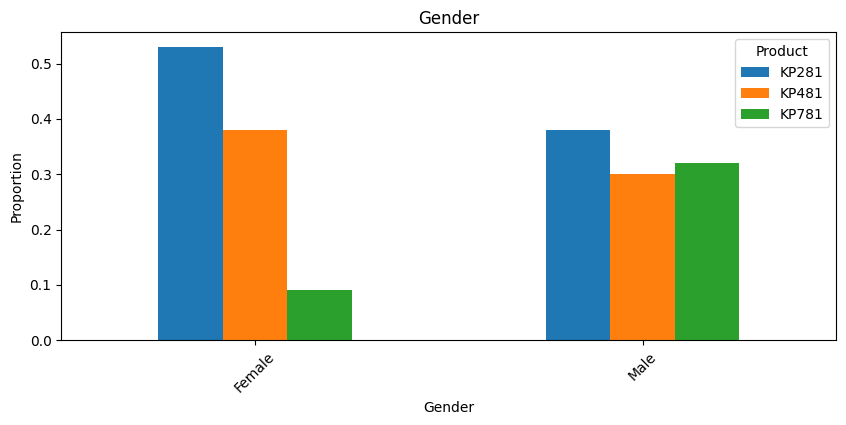

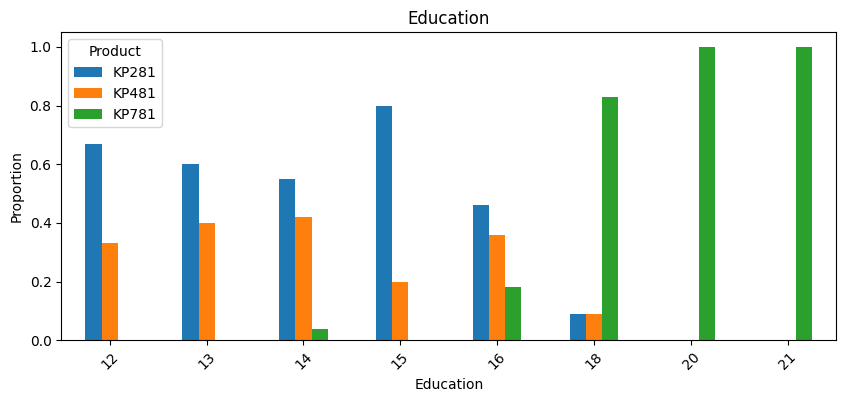

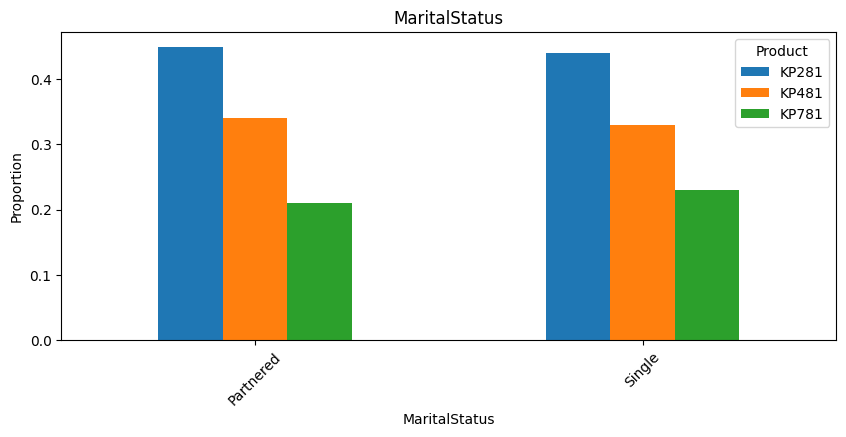

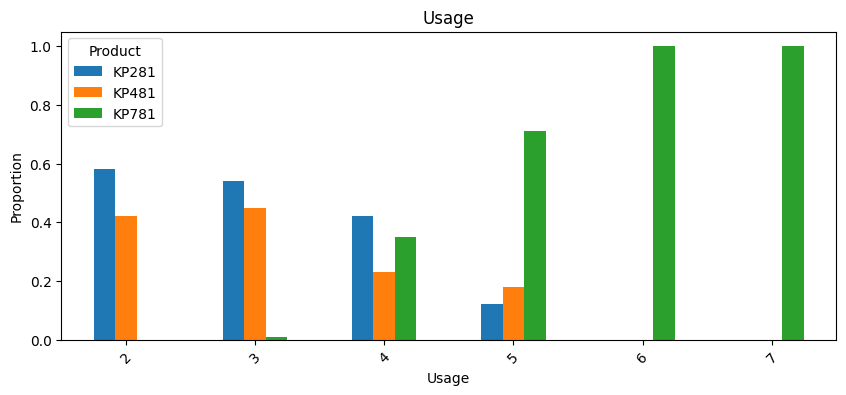

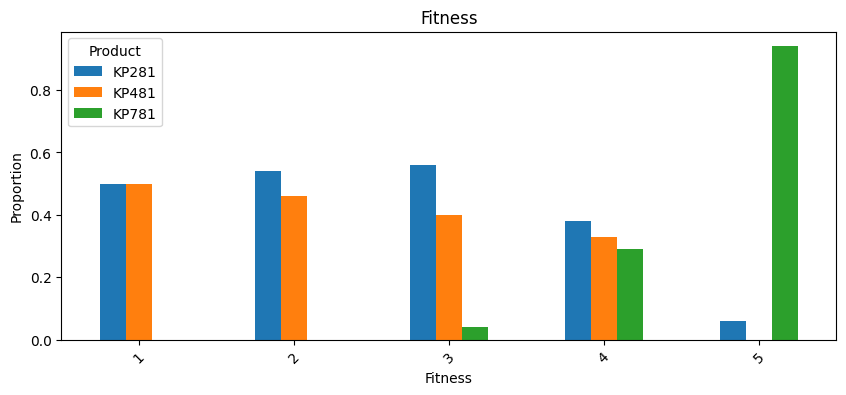

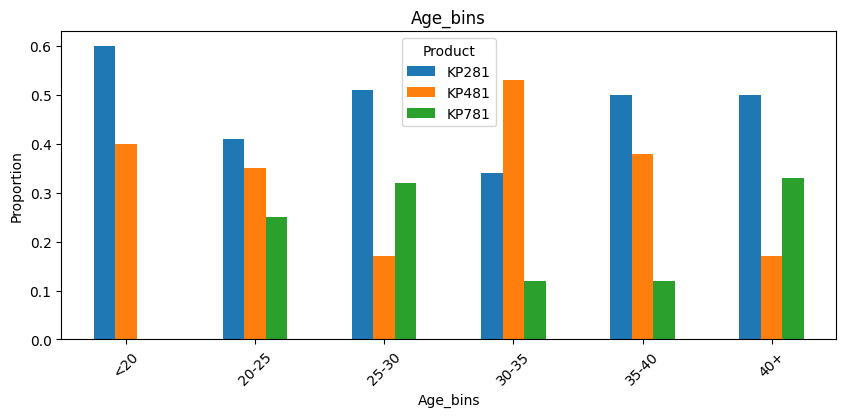

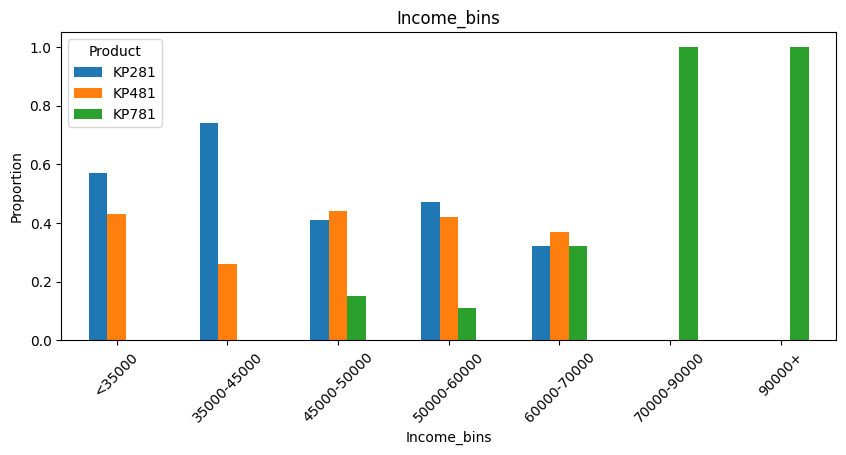

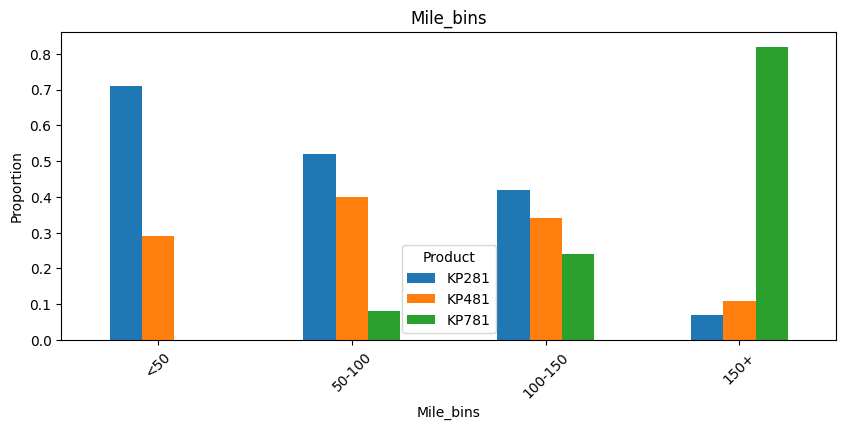

In [35]:
# Crosstabs -

cat_cols=['Gender','Education', 'MaritalStatus', 'Usage','Fitness','Age_bins','Income_bins','Mile_bins']
for i in cat_cols:
    other= round(pd.crosstab(df[df[i].notnull()][i], df['Product']).\
                 div(pd.crosstab(df[df[i].notnull()][i],df['Product']).apply(sum,1),0),2)
    ax = other.plot(kind ='bar', title = i, figsize = (10,4))
    ax.set_xlabel(i)
    ax.set_ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

**Observations on the basis of above Categorical Plots**


1) Around 55% of women prefer KP281 and only 10% prefer KP781. While around 35% of men prefer KP781.

2) 80% in Eduation level of 18 and everyone in Education levels of 20 or 21 use KP781 while below 14 level, no one uses KP781.

3) Marital Status implies no significant information on the usages of different treadmills.

4) Those who workout 6 or 7 days a week use KP781 while 60% of those who workout 5 days a week use KP781.

5) 95% of customers having fitness level of 5 use KP781 and none of those having fitness level below 3 use KP781.

6) No one below 20 years of age use KP781.

7) Above 70000 units of Income, people only use KP781 while in Incomes below 45000, no one uses KP781.

8) Almost 80% of people who run over 200 miles and those who run above 150 miles use KP781 and no one who runs below 50 miles use KP781. The usage of KP281 decreases with the increase in miles while that of KP781 increases with the increase in miles.

#### Let's deal with Probabilities -

**Conditional probabilities** - are the probability that an event occurs given that another event has occurred. For example, given that a customer is female, what is the probability she’ll purchase a Mac?

**Marginal Probablities** - Divide the row or column total by the total sample size. Marginal probabilities are the probabilities that a single event occurs with no regard to other events in the table. These probabilities do not depend on the condition of another outcome.
Probability(Mac) : Probability(Female)

**Normalize**: Default value is False Normalize by dividing all values by the sum of values:

If passed ‘all’ or True, will normalize over all values.

If passed ‘index’ will normalize over each row.

If passed ‘columns’ will normalize over each column.

If margins is True, will also normalize margin values.

In [36]:
pd.crosstab(index=df['Gender'],columns=df['Product'])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [37]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [38]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize=True)*100
#each element divided by 180

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [39]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize='index')
#each element divided by summation of individual rows

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


**Brief depiction of Probabilities Inferred from the above tables**

1) In all the tables, one can see the last row named All, it consists of the overall probabilities of purchases of those 3 treadmills, i.e. - Probability of purchase of KP281= 44.44%, KP481= 33.33% and KP781=22.22%

2) P(KP281|Education=12) = 66.66% and P(KP781|Education=18) = 82.6%
   P(KP781|Education=20) = P(KP781|Education=21) = 100%

3) P(KP281|Usage=2) = 57.57%, P(KP781|Usage=6)=P(KP781|Usage=7) = 100%

4) P(KP481|Fitness=2) = 46.15%

5) P(KP481|Age_bins=30-35) = 53.12%

6) P(KP781|Income>70000) = 100% and P(KP481|Income_bins=45000-50000) = 44.11%

7) P(KP281|Mile_bins<50) = 70.5% and  P(KP781|Mile_bins>150)=82.1%

**FINAL COLCLUSION**

**Customer Profiles for KP781**
<br>

1) Only people having incomes greater than 70k have run over 220 miles and all of then use KP781.

2) Recommend KP781 if one or more conditions are satisfied along with a necessary condition of Income > 70000:-
<br>
    a) Education Level >= 18
    b) Usage days > = 5
    c) Fitness Levels = 5
    d) The person runs more than 150 miles(80% of them use KP781)

3) Never Recommend KP781 if one or more of these conditions are satisfied:-
<br>
    a) Education Levels < 14
    b) Fitness < 3
    c) Age < 20
    d)Income < 45000
    e) Miles run < 50

**Why very few women have bought the luxurious KP781 treadmill?**
<br>
Only 2 women have incomes over 70k which is certainly the reason for a large proportion of them not buying KP781(affordability).


**Note for below mentioned points**
KP281 and KP481 don't have much differences in their costs and the characteristics of customers who use them . Still a few of them have been identified but they need to be validated with an incremental data.

**Customer Profiles for KP281:**

1) Women having incomes below 70k and age > 40
<br>
2) Customers having income in range 60k-70k and usage days=3
<br>
3) Customers having income in range 45k-50k and usage days=2
<br>
4) Customers having income in range 35k-45k and usage days=4
<br>
5) Customers having income in range 50k-60k and usage days=4
<br>
6) Customers with Fitness=4, age closer to 40 and income 50k-60k
<br>
7) Customers with Education Level=16, Age>32 and income 45k-50k
<br>
8) Customers with Education Level=16, Age>45 and income 60k-70k
<br>
9) Customers with Age in 25-30 and 35-40 having incomes in range 35k-45k
<br>
10) Customers with 40+ Age and 60k-70k income
<br>
11) Women with incomes < 35k and whose miles run < 105
<br>
12) Customers with usages=5, incomes in range 35k-45k and who run more than 140 miles
<br>
13) Customers with Fitness=5, incomes < 70k and Incomes in 45k-50k
<br>
14) Customers with Education level=15 having incomes less than 35k
<br>
15) Customers with Usages=3, miles run < 70 and Age>40
<br>
16) Customers with Usages=2 and Age between 25-30


**Customer Profiles for KP481:**

1) Women having incomes below 70k and age between 32-37
<br>
2) Customers with age < 25, incomes in range 50-60k and the miles run is in the range 100-150
<br>
3) Customers with Fitness=4, age in range 25-32 and income 50k-60k
<br>
4) Customers with Education Level=16, Age< 22 and income 45k-50k
<br>
5) Customers with Education Level=16, Age< 35 and income 60k-70k
<br>
6) Customers with 35-40 Age and 60k-70k income
<br>
7) Women with incomes < 35k and whose miles run >105
<br>
8) Men with incomes 60k-70k and who tread in range 100-150 miles
<br>
9) Customers with Fitness=4, incomes < 45k-50k and who run more than 100 miles
<br>
10) Customers with Education level=13 having incomes in ranges 45-60k
<br>
11) Customers with Usages=2 and Age>40